##**EDA**

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from imblearn.over_sampling import SMOTE

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Normalization
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam




In [9]:
df = pd.read_csv('/home/sabah/code/parvxi/Peaklytics/raw_data/Peaklytics_intial_data.csv')
df.head()

,Unnamed: 0,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,...,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,quater
0,0,#waywire,News,1750000.0,acquired,New York City,New York,1.0,2012-06-01,2012-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q2
1,2,'Rock' Your Paper,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-10-26,2012-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Q4
2,3,(In)Touch Network,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Q2
3,4,-R- Ranch and Mine,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-01-01,2014-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q1
4,10,"1,2,3 Listo",E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2012-01-01,2012-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Q1


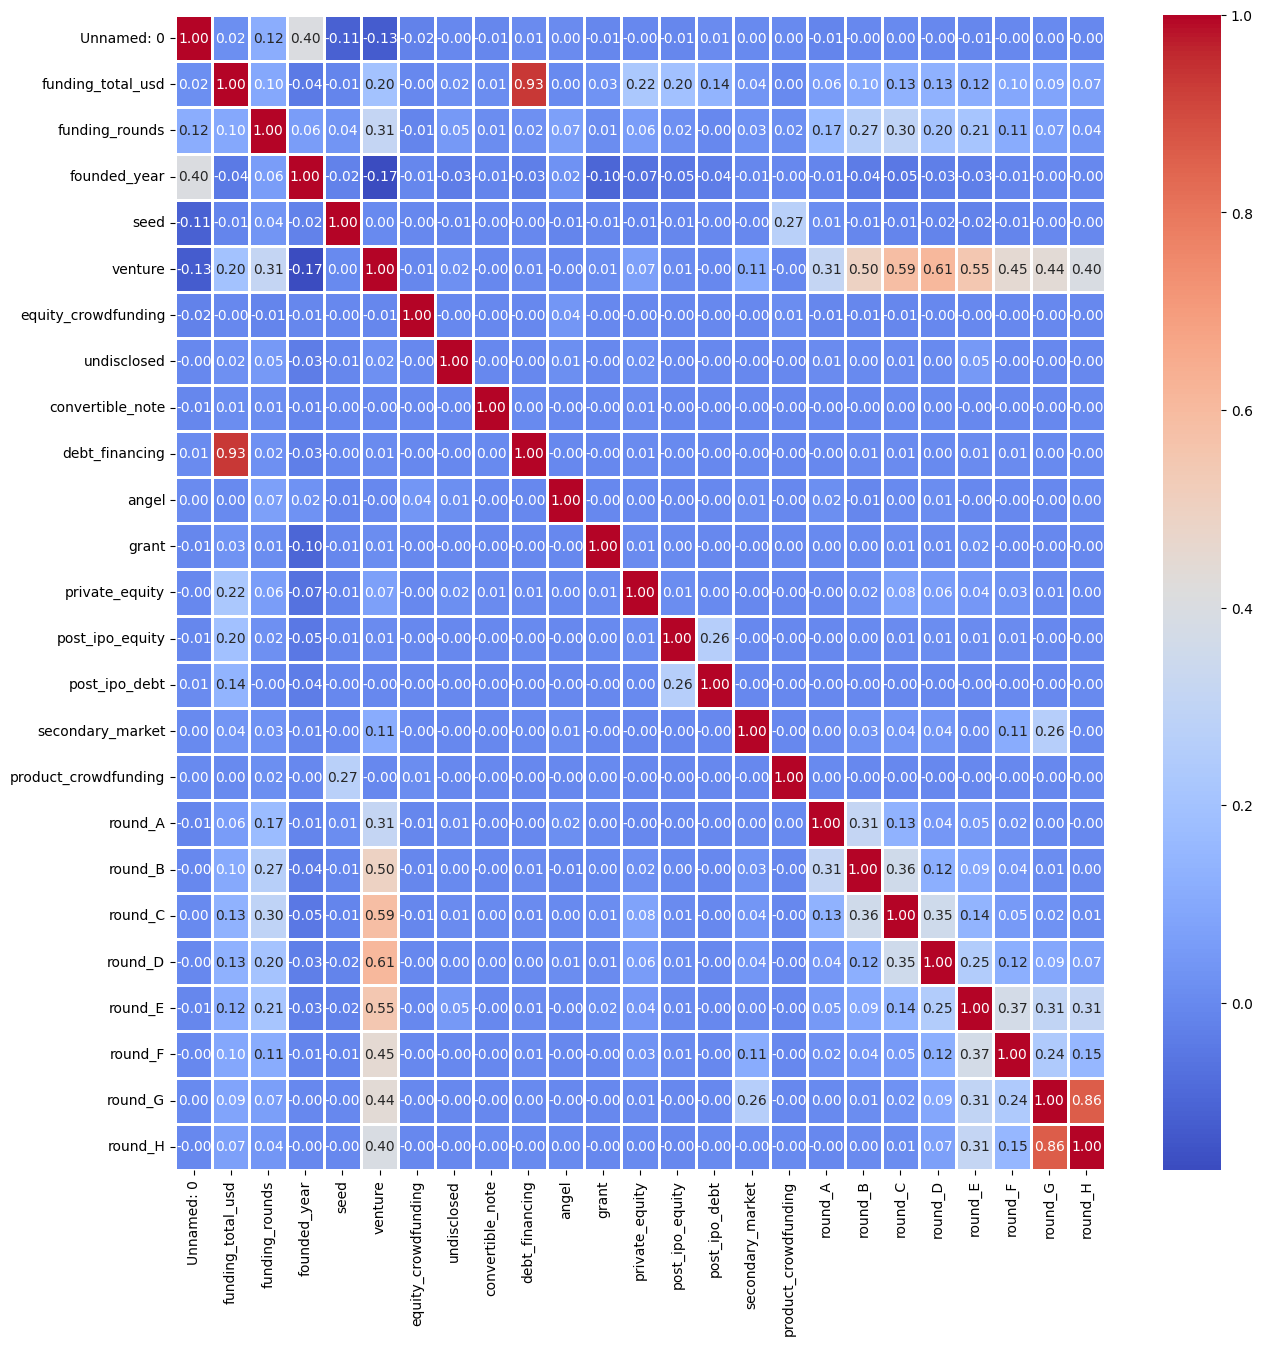

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns

corr_matrix = df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43268 entries, 0 to 43267
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            43268 non-null  int64  
 1   name                  43268 non-null  object 
 2   market                43268 non-null  object 
 3   funding_total_usd     43268 non-null  float64
 4   status                43268 non-null  object 
 5   region                43268 non-null  object 
 6   city                  43268 non-null  object 
 7   funding_rounds        43268 non-null  float64
 8   founded_at            43268 non-null  object 
 9   founded_month         43268 non-null  object 
 10  founded_quarter       43268 non-null  object 
 11  founded_year          43268 non-null  float64
 12  first_funding_at      43268 non-null  object 
 13  last_funding_at       43268 non-null  object 
 14  seed                  43268 non-null  float64
 15  venture            

In [12]:
df.isnull().sum()

Unnamed: 0                  0
name                        0
market                      0
funding_total_usd           0
status                      0
region                      0
city                        0
funding_rounds              0
founded_at                  0
founded_month               0
founded_quarter             0
founded_year                0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed             15298
convertible_note        15298
debt_financing          15298
angel                   15298
grant                   15298
private_equity          15298
post_ipo_equity         15298
post_ipo_debt           15298
secondary_market        15298
product_crowdfunding    15298
round_A                 15298
round_B                 15298
round_C                 15298
round_D                 15298
round_E                 15298
round_F                 15298
round_G   

In [13]:
df['status'].value_counts(normalize=True)

operating    0.555561
acquired     0.222220
closed       0.222220
Name: status, dtype: float64

In [14]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')
df['founded_at'] = pd.to_datetime(df['founded_at'],  errors='coerce')

###Feature Engineering

In [15]:
df['funding_category'] = df.apply(
    lambda x: 'Single Round - Traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() == 0
    else 'Single Round - Non-traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() > 0
    else 'Multiple Rounds', axis=1
)

In [16]:
current_year = datetime.now().year
df['company_age'] = current_year - df['founded_at'].dt.year

Remove unnecessary features for Peaklytics, as well as features that have high correlation with others.

In [17]:
df.drop(columns=['Unnamed: 0','round_G', 'round_H', 'debt_financing', 'founded_quarter', 'quater', 'founded_month', 'name', 'seed', 'venture', 'equity_crowdfunding','undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant','private_equity', 'post_ipo_equity', 'post_ipo_debt','secondary_market', 'round_A', 'round_B','product_crowdfunding', 'round_C', 'round_D', 'round_E', 'round_F', 'founded_year', 'founded_at'], inplace=True)

In [18]:
df.head()

,market,funding_total_usd,status,region,city,funding_rounds,first_funding_at,last_funding_at,country,funding_category,company_age
0,News,1750000.0,acquired,New York City,New York,1.0,2012-06-30,2012-06-30,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-08-09,2012-08-09,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04-01,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-08-17,2014-09-26,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2013-02-18,2013-02-18,Chile,Single Round - Non-traditional,12


Save the cleaned data to a new csv file

In [19]:
df.to_csv('cleaned_peaklytics_data.csv', index=False)

# Preprocessing

In [20]:
cleaned_df = pd.read_csv('/home/sabah/code/parvxi/Peaklytics/notebooks/cleaned_peaklytics_data.csv')

In [21]:
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,first_funding_at,last_funding_at,country,funding_category,company_age
0,News,1750000.0,acquired,New York City,New York,1.0,2012-06-30,2012-06-30,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-08-09,2012-08-09,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04-01,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-08-17,2014-09-26,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2013-02-18,2013-02-18,Chile,Single Round - Non-traditional,12


In [22]:
cleaned_df['first_funding_at'] = pd.to_datetime(cleaned_df['first_funding_at'], errors='coerce')
cleaned_df['last_funding_at'] = pd.to_datetime(cleaned_df['last_funding_at'], errors='coerce')

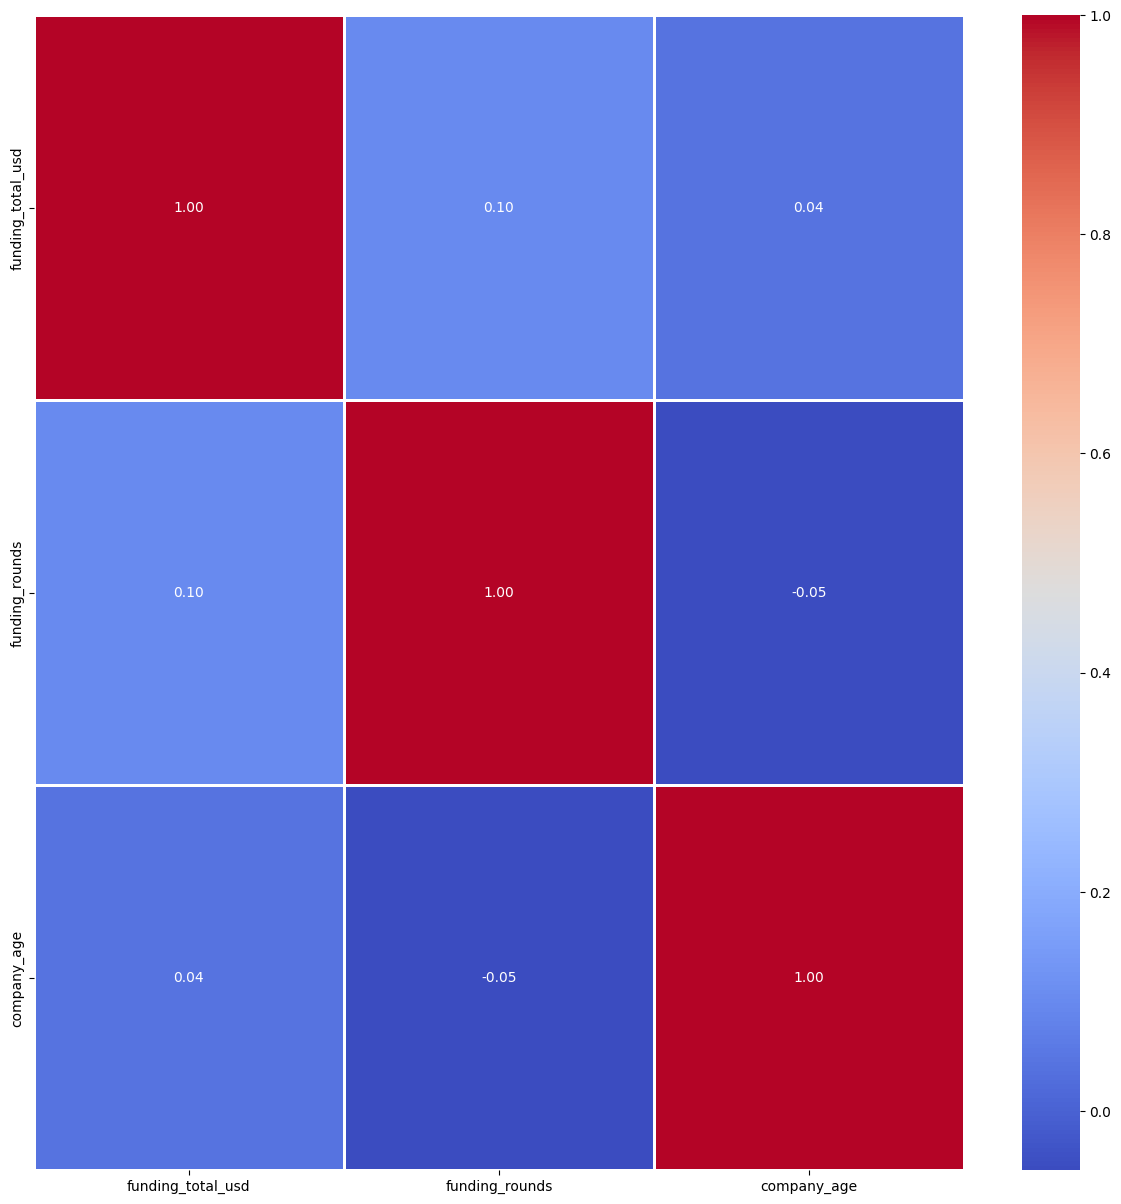

In [23]:
numerical_columns = cleaned_df.select_dtypes(include=['number']).columns

corr_matrix = cleaned_df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()

## Removing outliers, scaling, encoding, and imputing

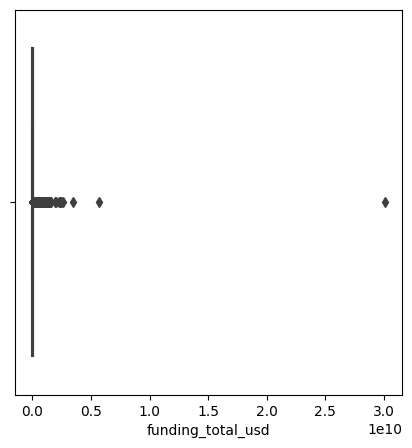

In [24]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='funding_total_usd', data=cleaned_df, ax=ax)
plt.show()

In [25]:
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Q1 = cleaned_df['funding_total_usd'].quantile(0.25)
Q3 = cleaned_df['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1 * IQR #1.25
upper_bound = Q3 + 1 * IQR


cleaned_df = df[(df['funding_total_usd'] >= lower_bound) & (df['funding_total_usd'] <= upper_bound)]


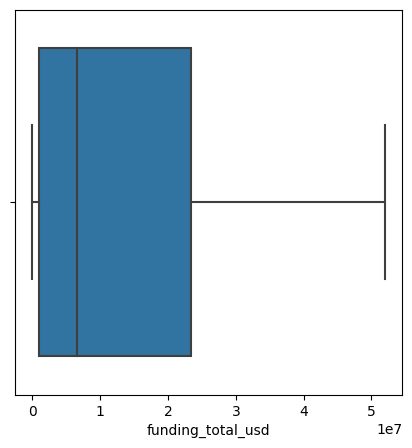

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x='funding_total_usd', data=cleaned_df, ax=ax)
plt.show()

In [27]:
duplicates_before = cleaned_df.duplicated().sum()
print(duplicates_before)
cleaned_df.drop_duplicates(inplace=True)

8


/tmp/ipykernel_78539/372861287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


In [28]:
duplicates_after = cleaned_df.duplicated().sum()
print(duplicates_after)

0


In [29]:
cleaned_df[['market', 'country', 'funding_category', 'city', 'region']].nunique()

market               699
country              104
funding_category       3
city                2885
region               877
dtype: int64

In [30]:

cleaned_df = pd.get_dummies(cleaned_df, columns=['funding_category', 'country'], drop_first=True)
cleaned_df.head()

,market,funding_total_usd,status,region,city,funding_rounds,first_funding_at,last_funding_at,company_age,funding_category_Single Round - Non-traditional,...,country_Tunisia,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam
0,News,1750000.0,acquired,New York City,New York,1.0,2012-06-30,2012-06-30,12,1,...,0,0,0,0,0,0,1,0,0,0
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-08-09,2012-08-09,12,1,...,0,0,0,0,0,0,0,0,0,0
2,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04-01,13,1,...,0,0,0,0,0,1,0,0,0,0
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-08-17,2014-09-26,10,0,...,0,0,0,0,0,0,1,0,0,0
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2013-02-18,2013-02-18,12,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
market_freq = cleaned_df['market'].value_counts(normalize=True)
cleaned_df['market_freq'] = cleaned_df['market'].map(market_freq)

city_freq = cleaned_df['city'].value_counts(normalize=True)
cleaned_df['city_freq'] = cleaned_df['city'].map(city_freq)

region_freq = cleaned_df['region'].value_counts(normalize=True)
cleaned_df['region_freq'] = cleaned_df['region'].map(region_freq)

cleaned_df = cleaned_df.drop(columns=['market', 'city', 'region'])
cleaned_df.head()

,funding_total_usd,status,funding_rounds,first_funding_at,last_funding_at,company_age,funding_category_Single Round - Non-traditional,funding_category_Single Round - Traditional,country_Argentina,country_Armenia,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,1750000.0,acquired,1.0,2012-06-30,2012-06-30,12,1,0,0,0,...,0,0,0,1,0,0,0,0.004686,0.039254,0.043143
1,40000.0,operating,1.0,2012-08-09,2012-08-09,12,1,0,0,0,...,0,0,0,0,0,0,0,0.001111,0.000628,0.000628
2,1500000.0,operating,1.0,2011-04-01,2011-04-01,13,1,0,0,0,...,0,0,1,0,0,0,0,0.000483,0.020364,0.024857
3,60000.0,operating,2.0,2014-08-17,2014-09-26,10,0,0,0,0,...,0,0,0,1,0,0,0,0.000314,0.000266,0.006281
4,40000.0,operating,1.0,2013-02-18,2013-02-18,12,1,0,0,0,...,0,0,0,0,0,0,0,0.022683,0.000048,0.003720


In [32]:
cleaned_df.shape

(41397, 114)

In [33]:
cleaned_df['status'].value_counts()

operating    22440
closed        9579
acquired      9378
Name: status, dtype: int64

In [34]:
le = LabelEncoder()
cleaned_df['status'] = le.fit_transform(cleaned_df['status'])

In [35]:
cleaned_df.shape

(41397, 114)

In [36]:
scaler = StandardScaler()
cleaned_df['funding_total_usd'] = scaler.fit_transform(cleaned_df[['funding_total_usd']])
cleaned_df.head()

,funding_total_usd,status,funding_rounds,first_funding_at,last_funding_at,company_age,funding_category_Single Round - Non-traditional,funding_category_Single Round - Traditional,country_Argentina,country_Armenia,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,-0.781935,0,1.0,2012-06-30,2012-06-30,12,1,0,0,0,...,0,0,0,1,0,0,0,0.004686,0.039254,0.043143
1,-0.896961,2,1.0,2012-08-09,2012-08-09,12,1,0,0,0,...,0,0,0,0,0,0,0,0.001111,0.000628,0.000628
2,-0.798752,2,1.0,2011-04-01,2011-04-01,13,1,0,0,0,...,0,0,1,0,0,0,0,0.000483,0.020364,0.024857
3,-0.895616,2,2.0,2014-08-17,2014-09-26,10,0,0,0,0,...,0,0,0,1,0,0,0,0.000314,0.000266,0.006281
4,-0.896961,2,1.0,2013-02-18,2013-02-18,12,1,0,0,0,...,0,0,0,0,0,0,0,0.022683,0.000048,0.003720


In [37]:
cleaned_df['funding_total_usd'].isnull().sum()

0

In [38]:
cleaned_df['funding_total_usd'].fillna(cleaned_df['funding_total_usd'].median(), inplace=True)

In [39]:
cleaned_df['funding_total_usd'].isnull().sum()

0

In [40]:
cleaned_df.isnull().sum()
cleaned_df.dropna(inplace=True)

In [41]:
cleaned_df.isnull().sum()

funding_total_usd     0
status                0
funding_rounds        0
first_funding_at      0
last_funding_at       0
                     ..
country_Uzbekistan    0
country_Viet Nam      0
market_freq           0
city_freq             0
region_freq           0
Length: 114, dtype: int64

In [42]:
cleaned_df.head()

,funding_total_usd,status,funding_rounds,first_funding_at,last_funding_at,company_age,funding_category_Single Round - Non-traditional,funding_category_Single Round - Traditional,country_Argentina,country_Armenia,...,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Viet Nam,market_freq,city_freq,region_freq
0,-0.781935,0,1.0,2012-06-30,2012-06-30,12,1,0,0,0,...,0,0,0,1,0,0,0,0.004686,0.039254,0.043143
1,-0.896961,2,1.0,2012-08-09,2012-08-09,12,1,0,0,0,...,0,0,0,0,0,0,0,0.001111,0.000628,0.000628
2,-0.798752,2,1.0,2011-04-01,2011-04-01,13,1,0,0,0,...,0,0,1,0,0,0,0,0.000483,0.020364,0.024857
3,-0.895616,2,2.0,2014-08-17,2014-09-26,10,0,0,0,0,...,0,0,0,1,0,0,0,0.000314,0.000266,0.006281
4,-0.896961,2,1.0,2013-02-18,2013-02-18,12,1,0,0,0,...,0,0,0,0,0,0,0,0.022683,0.000048,0.003720


In [43]:
cleaned_df.dtypes

funding_total_usd            float64
status                         int64
funding_rounds               float64
first_funding_at      datetime64[ns]
last_funding_at       datetime64[ns]
                           ...      
country_Uzbekistan             uint8
country_Viet Nam               uint8
market_freq                  float64
city_freq                    float64
region_freq                  float64
Length: 114, dtype: object

In [44]:
today = pd.to_datetime('today')
# cleaned_df['funding_duration_days'] = (cleaned_df['last_funding_at'] - cleaned_df['first_funding_at']).dt.days
cleaned_df['days_since_first_funding'] = (today - cleaned_df['first_funding_at']).dt.days
cleaned_df['days_since_last_funding'] = (today - cleaned_df['last_funding_at']).dt.days
cleaned_df.drop(columns=['first_funding_at', 'last_funding_at'], inplace=True)

In [45]:

X = cleaned_df.drop(columns=['status'])
y = cleaned_df['status']

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()

X_train_resampled['funding_total_usd'] = scaler.fit_transform(X_train_resampled[['funding_total_usd']])

X_test['funding_total_usd'] = scaler.transform(X_test[['funding_total_usd']])


In [47]:
median_funding = y_train_resampled.median()
y_pred_median = [median_funding] * len(y_test)

In [48]:

# For the median-based baseline
mae_median = mean_absolute_error(y_test, y_pred_median)
mse_median = mean_squared_error(y_test, y_pred_median)
rmse_median = np.sqrt(mse_median)
r2_median = r2_score(y_test, y_pred_median)

print(f"Baseline Median - MAE: {mae_median}, MSE: {mse_median}, RMSE: {rmse_median}, R²: {r2_median}")


Baseline Median - MAE: 0.7674839956516487, MSE: 0.7674839956516487, RMSE: 0.8760616391850796, R²: -0.14954676778265275


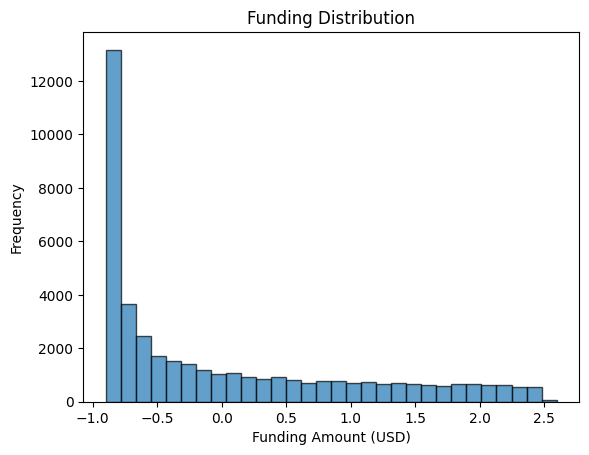

In [49]:

# Histogram of 'funding_total_usd'
plt.hist(cleaned_df['funding_total_usd'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Funding Distribution')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Frequency')
plt.show()


In [50]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
data_skewness = skew(cleaned_df['funding_total_usd'])
data_kurtosis = kurtosis(cleaned_df['funding_total_usd'], fisher=False)  # fisher=False to get Pearson's definition of kurtosis

print(f'Skewness: {data_skewness}')
print(f'Kurtosis: {data_kurtosis}')


Skewness: 0.968704281128338
Kurtosis: 2.6300880336024894


In [51]:
# When I tested the model with the original data, the model was not performing well. So, I read that using log is better for skewed data.
# y_train_log = np.log1p(y_train_resampled)
# y_test_log = np.log1p(y_test)

In [52]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train_resampled, y_train_log)
# y_pred = model.predict(X_test)
# model.score(X_test, y_test_log)

In [53]:
# the final we have to return the original values, so we have to raise it to the power of e
# y_pred_original = np.expm1(y_pred_log)

In [54]:
# Reshape X_train_resampled
X_train_resampled = X_train_resampled.values.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))


In [55]:
X_train_resampled.shape

(53862, 1, 113)

In [56]:
from tensorflow.keras.utils import to_categorical

y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)
y_train_resampled.shape

(53862, 3)

In [58]:
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [70]:
# Define the RNN model
# Adapting a Normalization Layer to X_train
normalizer = Normalization()
normalizer.adapt(X_train_resampled)

# Building the RNN architecture
model = Sequential()
model.add(normalizer)

# First RNN Layer with more units and return_sequences=True to stack another RNN layer
#model.add(SimpleRNN(units=150, activation='tanh', return_sequences=True))
model.add(LSTM(units=300, activation='tanh', return_sequences=True))

# Second RNN Layer
model.add(LSTM(units=300, activation='tanh', return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Third RNN Layer
model.add(LSTM(units=300, activation='tanh', return_sequences=True))


# Fourth RNN LSTM (Final, without return_sequences)
model.add(LSTM(units=300, activation='tanh'))


# Output Layer
model.add(Dense(3, activation='softmax'))

In [75]:
# Printing the RNN summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, None, 113)        227       
 ion)                                                            
                                                                 
 lstm (LSTM)                 (None, None, 200)         251200    
                                                                 
 dropout_3 (Dropout)         (None, None, 200)         0         
                                                                 
 batch_normalization_2 (Batc  (None, None, 200)        800       
 hNormalization)                                                 
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 150)         52650     
                                                                 
 dropout_4 (Dropout)         (None, None, 150)        

In [71]:
def compile_model(model):
    model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy',Precision(), Recall()])
    return model

model = compile_model(model)

In [72]:
%%time

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

#model.fit(X_train_resampled, y_train, epochs=20, batch_size=32, validation_split=0.2)

history = model.fit(X_train_resampled, y_train_resampled,
                    validation_split=0.2,
                    batch_size=64, 
                    epochs=20, 
                    callbacks=[es],
                    verbose=1)


Epoch 1/20
674/674 [==============================] - 41s 51ms/step - loss: 0.8765 - accuracy: 0.7012 - precision_2: 0.7350 - recall_2: 0.3207 - val_loss: 1.2149 - val_accuracy: 0.0336 - val_precision_2: 0.0332 - val_recall_2: 0.0327
Epoch 2/20
674/674 [==============================] - 59s 88ms/step - loss: 0.6466 - accuracy: 0.7256 - precision_2: 0.7300 - recall_2: 0.7105 - val_loss: 1.3188 - val_accuracy: 0.0343 - val_precision_2: 0.0336 - val_recall_2: 0.0328
Epoch 3/20
674/674 [==============================] - 38s 57ms/step - loss: 0.6042 - accuracy: 0.7366 - precision_2: 0.7446 - recall_2: 0.7112 - val_loss: 1.2864 - val_accuracy: 0.0374 - val_precision_2: 0.0362 - val_recall_2: 0.0335
Epoch 4/20
674/674 [==============================] - 32s 48ms/step - loss: 0.5769 - accuracy: 0.7481 - precision_2: 0.7608 - recall_2: 0.7155 - val_loss: 1.2520 - val_accuracy: 0.0387 - val_precision_2: 0.0385 - val_recall_2: 0.0366
Epoch 5/20
674/674 [==============================] - 43s 63ms/s

In [68]:
def plot_learning_curve(history):
    """Function to plot the learning curves."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.show()

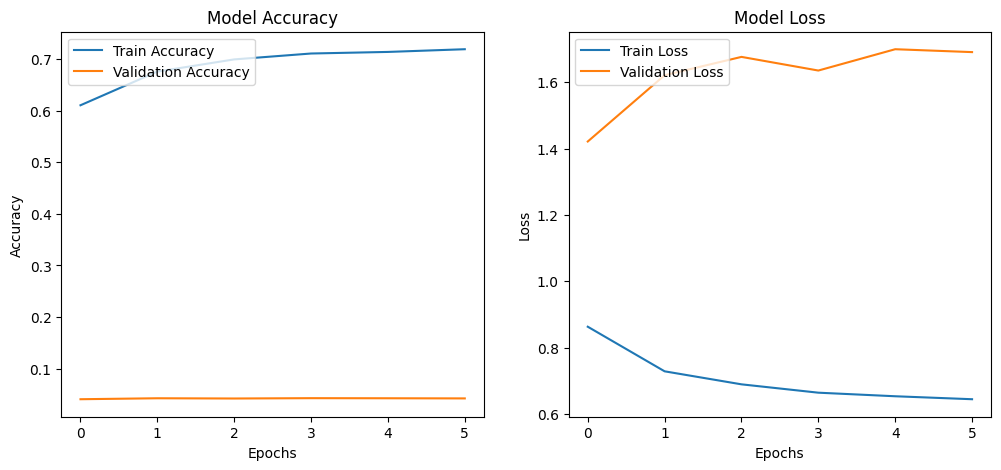

In [69]:
plot_learning_curve(history)